# Trabajo Práctico de Análisis de Circuitos

* **Alumna:** Verónica Bustamante
* **Cuatrimestre:** $1^{er}$ cuatrimestre 2019
* **Fecha de defensa:** 11 de junio de 2019
* **Fecha de medición:** 18 de junio de 2019

Se desea implementar un filtro cuya transferencia sea:
\begin{equation}
    H(s)=\frac{s^2}{s^2+2666 \cdot s+3.553\times 10^6}
    \label{eq:transferencia_5}
\end{equation}    
 
 La cuál podemos leer de la siguiente forma:
 
 \begin{equation}
    H(s)=\frac{h_0 \cdot s^2}{s^2+\frac{\omega_0}{Q}\cdot s+\omega_0^{2}} 
    \label{eq:pasa_altos}
\end{equation}

 
 $$ $$

 La transferencia es del tipo pasa-altos, teniendo un cero doble en el origen y un par de polos complejo-conjugados en el semiplano izquierdo.
 
 Otra forma de ver que es un pasa-altos es fijándose el valor de Q (que deberá dar mayor a 0,5) y que la transferencia cumple de forma simultánea que: 
 
 $$ \lim_{\omega \rightarrow 0} \left | H(j\omega) \right |= 0$$
 $$ \lim_{\omega \rightarrow \infty} \left | H(j\omega) \right |= 1$$
 

 

  ## Polos y Ceros de la transferencia

Buscamos los polos y ceros utilizando Octave:

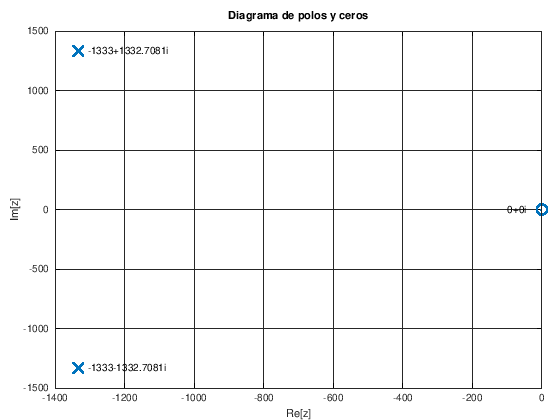

In [1]:
pkg load control
clc
clear all
close all

s = tf('s');
h = (s^2)/(s^2+2666*s+3.553*10^6);
[p,z]= pzmap2(h);
pzmap2(h)

text(real(p) - 0.02* real(p), imag(p),num2str(p))
text(-100, 0,"0+0i")

Los polos son $p_{1,2}= -1333 \pm 1332.7j$ y los ceros son $z_{1,2}=0+0j$

 ## Parámetros que caracterizan al filtro
 
 Observando la ecuación de la transferencia del filtro podemos obtener fácilmente que: 
$$ h_0= 1$$

Y operando en el denominador:
 $$ s^2+2666\cdot s+3.553\times 10^6 = s^2+\frac{\omega_0}{Q} \cdot s+\omega_0^{2}$$
 
 Con lo cual, comparando, lo más sencillo de ver es que:
 $$\omega_0= \sqrt{3.553\times 10^6}=\sqrt{3.553}\times 10^3 =2 \pi \cdot 300 $$
 
 Y sabiendo la relación entre frecuencia de corte y pulsación:
 $$f_0= \frac{\omega_0}{2\cdot \pi}= 300 $$
 
 Además,puede observarse que:
 $$2666= \frac{\omega_0}{Q}$$
 
 De tal forma que si se reemplaza el valor de $w_0$ en la ecuación, obtenemos que:
 
 $$Q=\frac{\omega_0}{2666}=0.7070293764$$

## Diagrama de Bode (módulo y fase)

Realizamos el diagrama de Bode para ambos casos. Definimos un par de funciones que nos pueden ser de utilidad:

In [2]:
%Dibuja el bode de fase

function graficar_fase_dB (string,w_ideal,fase_ideal,color="b")
  semilogx(w_ideal,fase_ideal,"markersize", 10, "linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("Arg(H(jw)) []")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction


In [3]:
%Dibuja el bode del modulo

function graficar_modulo_dB (string,w_ideal,Modulo_ideal_dB,color="b")
  semilogx(w_ideal,Modulo_ideal_dB, "markersize", 10, "linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("|H(jw)| [dB]")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction


Luego de esas definiciones, las usamos en nuestro script y obtenemos los gráficos:

ans =  100


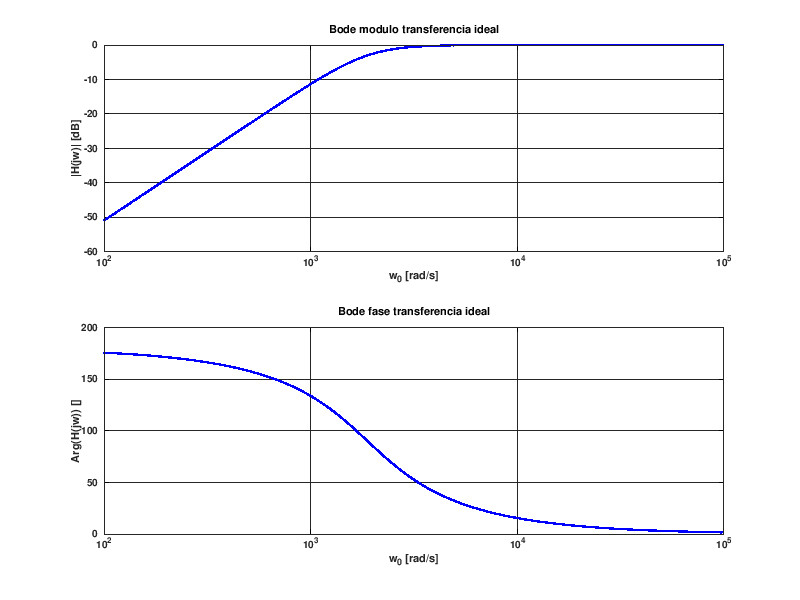

In [4]:
%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[800 600];
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);


%Obtenemos el bode
[Modulo_ideal,fase_ideal, w_ideal] = bode(h);
w_ideal(1)
Modulo_ideal_dB = 20*log10(Modulo_ideal);

%Graficamos
subplot(2,1,1);
graficar_modulo_dB("Bode modulo transferencia ideal",w_ideal,Modulo_ideal_dB);
subplot(2,1,2);
graficar_fase_dB("Bode fase transferencia ideal",w_ideal,fase_ideal);

## Respuesta al escalón y respuesta al impulso

Mostraremos las respuestas al escalón y al impulso generadas por un script en Octave. Para el caso de la respuesta al escalón nos inventaremos una función dado que se necesitará más adelante también una función de dichas características.

In [5]:
function respuesta_al_escalon(h,string="Respuesta al escalon",color="b")
    [Y_step_ideal,T_step_ideal] = step(h);
    plot(T_step_ideal, Y_step_ideal,"markersize", 10, "linewidth", 5,"color",color)
    title(string)
    xlabel ("Tiempo [s]");
    ylabel ("Tension [V]");
    grid on
    grid minor on
endfunction

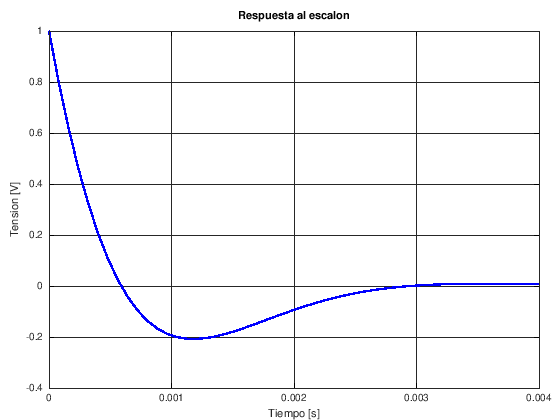

In [6]:
%Llamamos a la funcion para ver el gráfico
respuesta_al_escalon(h)

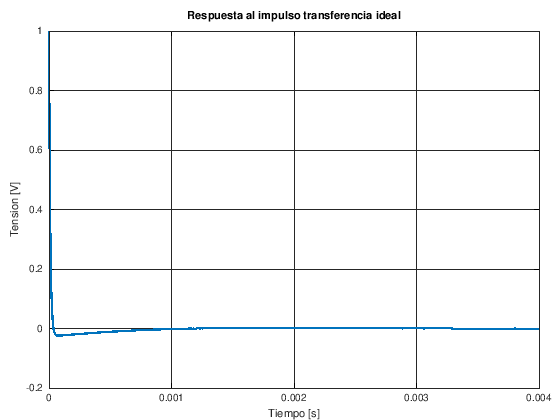

In [7]:
%RESPUESTA AL IMPULSO

%graficamos la respuesta al impulso, necesitaremos de un truco,
% definiremos un polo que no existe de forma de limitar el ancho de banda. 
% Lo hacemos así porque a respuesta a la delta tiene una delta.
h_trucha=h/(s+10e4);
[Y_impulse_ideal,T_impulse_ideal] = impulse(h_trucha);
figure()
plot(T_impulse_ideal, Y_impulse_ideal,"markersize", 10, "linewidth", 5)
title("Respuesta al impulso transferencia ideal")
xlabel ("Tiempo [s]");
ylabel ("Tension [V]");
grid on
grid minor on


## Respuesta a cuadradas 

Mostraremos la respuesta a 3 cuadradas en un script hecho en Octave para 3 frecuencias:
* $f=\frac{f_0}{10}$
* $f=f_0$
* $f=10 \cdot f_0$

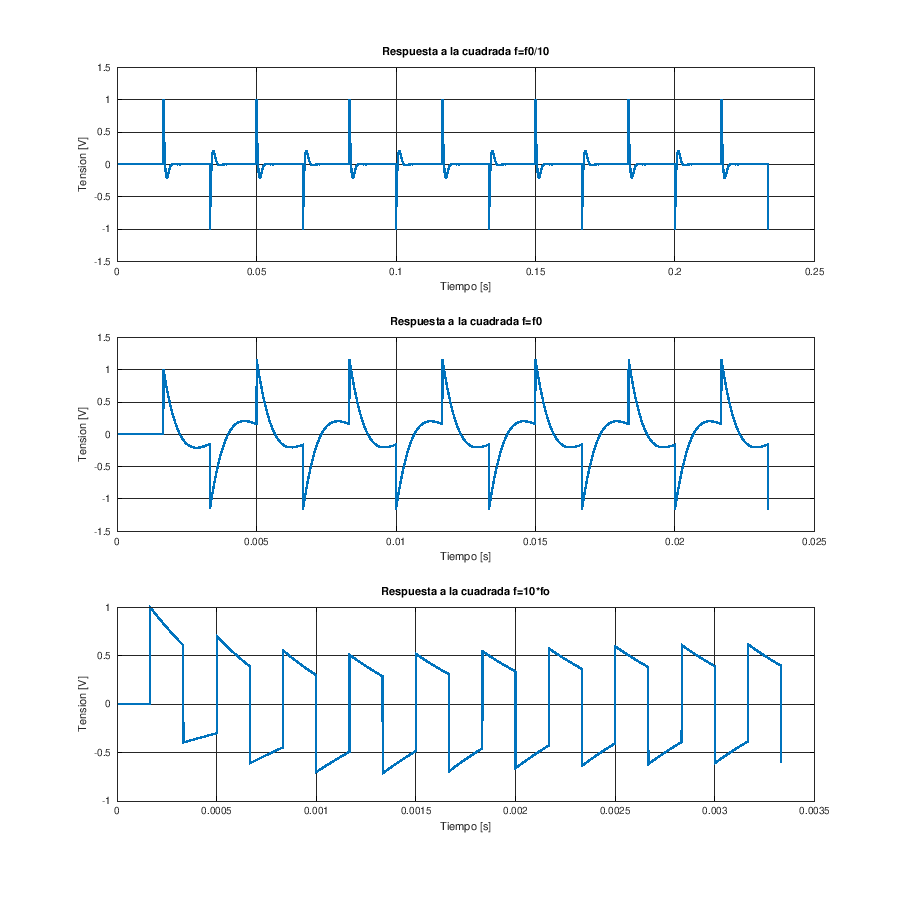

In [8]:
w0=sqrt(3.553)*10^3;
f0=w0/(2*pi);

%Creo una función para generar la onda cuadrada así no repito 3 veces el mismo código
function generar_onda_cuadrada(h,periodo , duracion_en_periodos, titulo)
    [cuad,t] = gensig("SQUARE" , periodo , periodo*duracion_en_periodos,periodo/500);  %armo mi cuadrada de periodo 10/fo y duracion 5 periodos
    [V1,t1] = lsim(h,cuad,t); % respuesta al filtro
    plot(t1,V1,"markersize", 10, "linewidth", 5)
    xlabel("Tiempo [s]")
    ylabel("Tension [V]")
    title(titulo)
    grid on
endfunction

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[900 900];
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);

%Armo mi cuadrada de periodo 10/fo y duracion 7 periodos
subplot(3,1,1);
generar_onda_cuadrada(h,10/f0 , 7,"Respuesta a la cuadrada f=f0/10");  

% Defino una cuadrada con T= 1/f0 y dura 7 periodos
subplot(3,1,2);
generar_onda_cuadrada(h,1/f0 , 7,"Respuesta a la cuadrada f=f0"); 

% Defino una cuadrada con T= 1/(10*f0) (frec 10 f0) y dura 10 periodos
subplot(3,1,3);
generar_onda_cuadrada(h,1/(10*f0) , 10,"Respuesta a la cuadrada f=10*fo"); 


## Circuito con Opamps para la transferencia propuesta

Para la implementación, se adopta un filtro del tipo *Sallen-Key* pasa-altos, ya que son muy simples circuitalmente y poseen un buen comportamiento en cuanto a la tolerancia de los componentes.
![Pasa Altos Sallen-Key](img/sallenkey_hpass.png)


El circuito produce un filtro pasa bajo o pasa alto de dos polos usando dos resistencias, dos capacitores y un opamp. Si deseasemos un filtro de orden mayor u otro tipo de filtro, bastaría con poner en cascada varias etapas.
Además, de necesitarse, es muy simple armar un pasaaltos a partir de un pasabajos para este tipo de filtros (***M.E.Van Valkenburg***,*"Analog Filter Design"*, cap.6, pp.180)

De esta forma, tomando el cuenta el Capítulo 6 del libro citado, podemos determinar que para un pasa-altos de segundo orden del tipo *Sallen-Key* tendremos la siguiente transferencia:

$$ H(s)= \frac{s^{2}}{s^{2}+s\cdot \left(\frac{1}{ R_2 C_1}+\frac{1}{ R_2 C_2}\right) + \frac{1}{R_1 R_2 C_1 C_2}}$$
 Donde podemos identificar que:
 $$ \omega_{0}^{2}=\frac{1}{R_1 R_2 C_1 C_2}$$
 
 $$\frac{\omega_0}{Q}=\frac{1}{ R_2 C_1}+\frac{1}{ R_2 C_2} $$
 
 $$Q=\frac{\sqrt{R_1 R_2 C_1 C_2}}{R_1\left(C_{1}+C_{2}\right)}$$
 

## Valores de los componentes normalizados para el filtro

Procedemos a armar un script en Octave que nos dará los valores normalizados de resistencias y capacitores. Además mostraremos cómo nos queda la transferencia del circuito utilizándolos.


In [9]:
pkg load control
pkg load symbolic
clc
clear all

%Colores para la terminal asi se ve mejor

RESET=  "\033[0m";;
BLACK=  "\033[30m";
RED=    "\033[31m";
GREEN=  "\033[32m";
ORANGE=  "\033[33m";
BLUE=  "\033[34m";
MAGENTA=  "\033[35m";
AZUL_CLARITO=  "\033[36m";

%Definimos las ecuaciones y todo lo que necesitamos para calcular la R
 function y = f(R)
  w0 = sqrt(3.553)*10^3;
  f0=w0/(2*pi);
  Q=w0/2666;
  C1_Norm = 10e-9;
  C2_Norm = 10e-9;
  y(1) = (1/(C1_Norm*C2_Norm*R(2)*R(1)))-w0^2;
  y(2) = sqrt(C1_Norm*C2_Norm*R(2)*R(1))/(R(1)*(C1_Norm+C2_Norm))-Q;

 endfunction

  %Calculamos las R por fsolve
  printf("\n\n");
  printf("%s ** Calculamos por fsolve los valores de las resistencias y su error ** %s \n",AZUL_CLARITO,RESET);
  printf("\n\n");
  [r, error] = fsolve ("f", [20e3;20e3])
 
  C1_Norm_elegida = 10e-9;
  C2_Norm_elegida = 10e-9;

  %normalizo los valores de R
  
  %Armo la serie e96 (me podría fijar en una tabla también)
  n=1:96;
  e96_serie_k=(round(10.^((n-1)/96)*100)/100)*10^4;
  e96_serie=e96_serie_k(e96_serie_k>4.7e3 & e96_serie_k<1.6e6);

  %seteo valores por default a r1 y a r2 para inicializarlas
  r1=0;
  r2=0;
  
  %busco el valor más próximo de resistencias al original
  error_resistencia_1=r(1)-e96_serie;
  [valor_error_r1,indice_r1]=min(abs(error_resistencia_1));
  if (valor_error_r1<r(1)/10)
    r1=e96_serie(indice_r1);
  else
    printf("%s No cambia el valor de R2, hay algún problema en el valor %s",RED,RESET);
  endif
  
  error_resistencia_2=r(2)-e96_serie;
 [valor_error_r2,indice_r2]=min(abs(error_resistencia_2));
  if (valor_error_r2<r(2)/10)
   r2=e96_serie(indice_r2);
  else
    printf("%s No cambia el valor de R2, hay algún problema en el valor %s",RED,RESET);
  endif
  
  %Muestro cuáles valores son y los que calcule previamente
  printf("%s ** Normalizamos los valores de las resistencias para E96 ** %s \n",AZUL_CLARITO,RESET);
  printf("\n\n");
  printf("%s <-------------------R1---------------------> %s \n",GREEN,RESET);
  printf("R1 normalizado:%s %.3g Ohm %s\n",GREEN,r1,RESET);
  printf("R1 calculado numéricamente:%s %.4g Ohm %s\n",MAGENTA,r(1),RESET);
  printf("%s <------------------------------------------> %s \n",GREEN,RESET);

  printf("\n\n");
  printf("%s <-------------------R2---------------------> %s \n",GREEN,RESET);
  printf("R2 normalizado:%s %.3g Ohm %s\n",GREEN,r2,RESET);
  printf("R2 calculado numéricamente::%s %.4g Ohm %s\n",MAGENTA,r(2),RESET);
  printf("%s <------------------------------------------> %s \n",GREEN,RESET);
  
  
  w0_cuadrado_estim=(1/(C1_Norm_elegida*C2_Norm_elegida*r2*r1));
  Q_estim= sqrt(C1_Norm_elegida*C2_Norm_elegida*r2*r1)/(r1*(C1_Norm_elegida+C2_Norm_elegida));
  wo_sobre_Q_estim=sqrt(w0_cuadrado_estim)/Q_estim;
  printf("\n\n");
  
  printf("%s ** Mostramos las transferencias ** %s \n",AZUL_CLARITO,RESET);
  printf("\n\n");
  %muestro la transferencia original
  s = tf('s');
  printf("%s Transferencia original: %s \n",ORANGE,RESET);
  h = (s^2)/(s^2+2666*s+3.553*10^6)
  printf("\n\n");
  %muestro la transferencia obtenida
  printf("%s Transferencia obtenida con los valores normalizados: %s \n",ORANGE,RESET);
  h2 = (s^2)/(s^2+wo_sobre_Q_estim*s+w0_cuadrado_estim)






 ** Calculamos por fsolve los valores de las resistencias y su error **  


r =

   37517.59077
   75018.75469

error =

   3.1497e-06   2.2204e-16

 ** Normalizamos los valores de las resistencias para E96 **  


 <-------------------R1--------------------->  
R1 normalizado: 3.74e+04 Ohm 
R1 calculado numéricamente: 3.752e+04 Ohm 
 <------------------------------------------>  


 <-------------------R2--------------------->  
R2 normalizado: 7.5e+04 Ohm 
R2 calculado numéricamente:: 7.502e+04 Ohm 
 <------------------------------------------>  


 ** Mostramos las transferencias **  


 Transferencia original:  

Transfer function 'h' from input 'u1' to output ...

                s^2           
 y1:  ------------------------
      s^2 + 2666 s + 3.553e+06

Continuous-time model.


 Transferencia obtenida con los valores normalizados:  

Transfer function 'h2' from input 'u1' to output ...

                s^2           
 y1:  ------------------------
      s^2 + 2667 s + 3.565e+0

## Diagramas de bode y respuesta al escalón para los valores normalizados

Obtenemos cómo se ve el diagrama de bode para la nueva transferencia y además la respuesta al escalón para ver las diferencias.


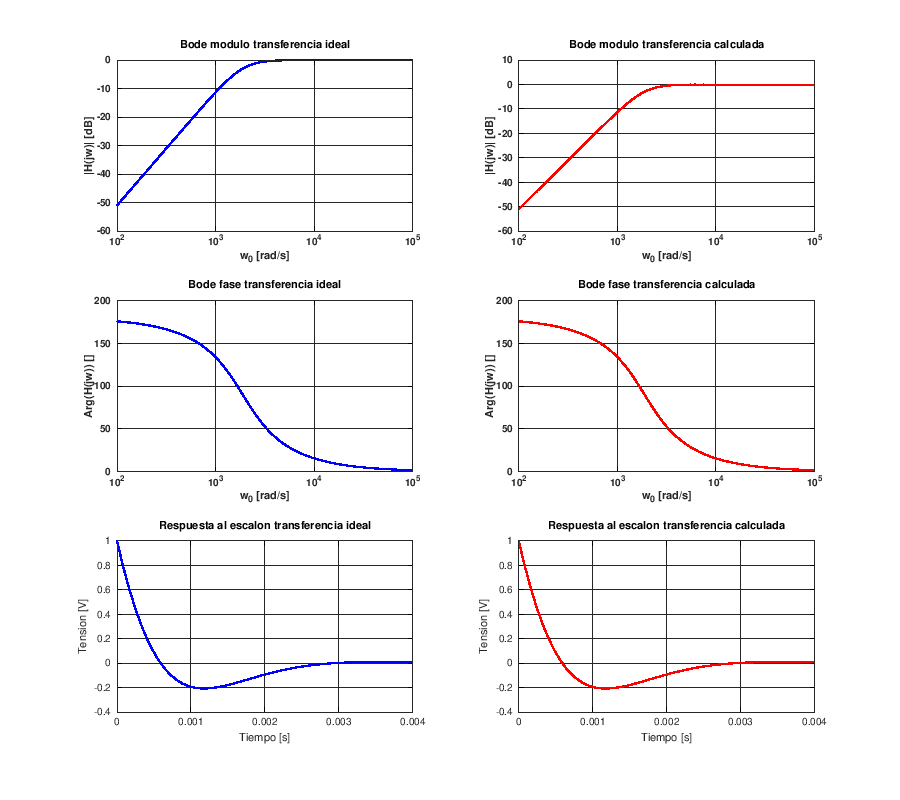

In [10]:
pkg load control
pkg load symbolic
clc
clear all
close all

s = tf('s');

%Dibuja el bode del modulo

function graficar_modulo_dB (string,w_ideal,Modulo_ideal_dB,color="b")
  semilogx(w_ideal,Modulo_ideal_dB, "markersize", 10, "linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("|H(jw)| [dB]")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction

%Dibuja el bode de fase

function graficar_fase_dB (string,w_ideal,fase_ideal,color="b")
  semilogx(w_ideal,fase_ideal,"markersize", 10, "linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("Arg(H(jw)) []")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction

%Respuesta al escalon
function respuesta_al_escalon(h,string="Respuesta al escalon",color="b")
    [Y_step_ideal,T_step_ideal] = step(h);
    plot(T_step_ideal, Y_step_ideal,"markersize", 10, "linewidth", 5,"color",color)
    title(string)
    xlabel ("Tiempo [s]");
    ylabel ("Tension [V]");
    grid on
    grid minor on
endfunction

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[900 800];
graphics_toolkit("gnuplot");
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);


%%%%%%%%TRANSFERENCIA ORIGINAL
h = (s^2)/(s^2+2666*s+3.553*10^6);
[Modulo_ideal,fase_ideal, w_ideal] = bode(h);
Modulo_ideal_dB = 20*log10(Modulo_ideal);

%%%%%MODULO
subplot(3,2,1);
graficar_modulo_dB("Bode modulo transferencia ideal",w_ideal,Modulo_ideal_dB);
%%%FASE
subplot(3,2,3);
graficar_fase_dB("Bode fase transferencia ideal",w_ideal,fase_ideal);
%%%RESPUESTA AL ESCALON
subplot(3,2,5);
respuesta_al_escalon(h,"Respuesta al escalon transferencia ideal")

%%%%%%%%TRANSDERENCIA ESTIMADA
h_est=(s^2)/(s^2+2667*s+3.565*10^6);
[Modulo_ideal_2,fase_ideal_2, w_ideal_2] = bode(h_est);
Modulo_ideal_dB_2 = 20*log10(Modulo_ideal_2);

%%%%%MODULO
subplot(3,2,2);
graficar_modulo_dB("Bode modulo transferencia calculada",w_ideal_2,Modulo_ideal_dB_2,"r");
%%%FASE
subplot(3,2,4);
graficar_fase_dB("Bode fase transferencia calculada",w_ideal_2,fase_ideal_2,"r");
%%%RESPUESTA AL ESCALON
subplot(3,2,6);
respuesta_al_escalon(h_est,"Respuesta al escalon transferencia calculada","r")

No se pueden observar diferencias muy notorias entre ambas transferencias, se comportan de manera equivalente. De hecho, no se notan diferencias de valores al hacer zoom en distintas partes del gráfico. Es decir que: la diferencia entre ambas debe ser muy pequeña, casi nula, lo cual nos ayuda mucho a la hora de conseguir los resultados que esperamos de nuestro filtro. Solaparemos los gráficos a ver qué ocurre.

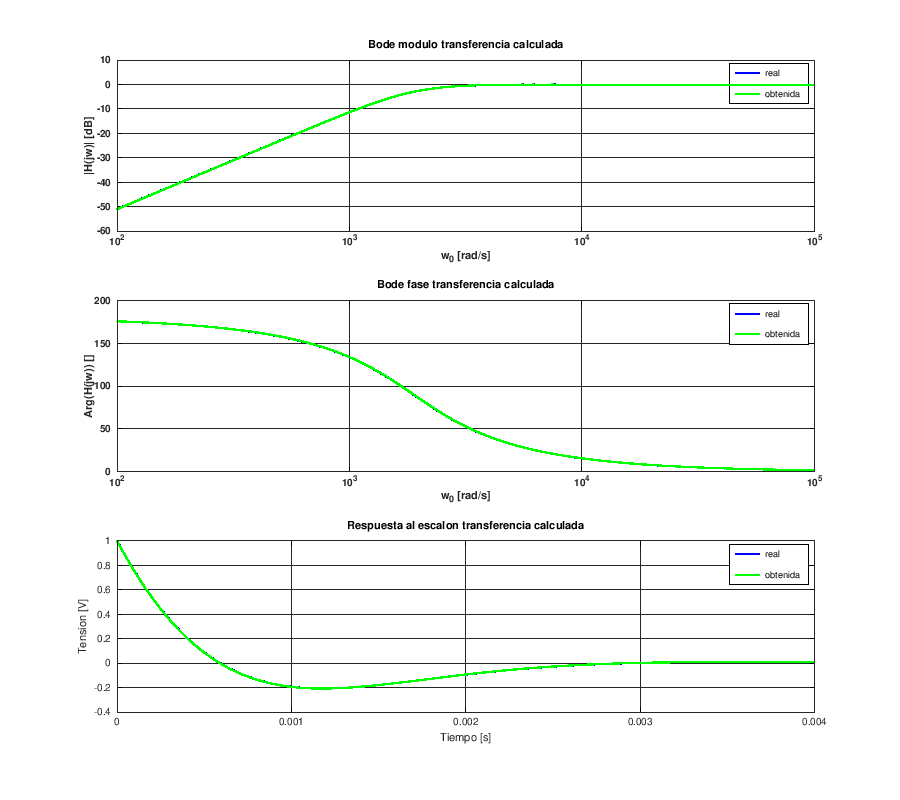

In [11]:
pkg load control
pkg load symbolic
clc
clear all
close all

s = tf('s');

%Dibuja el bode del modulo

function graficar_modulo_dB (string,w_ideal,Modulo_ideal_dB,color="b")
  semilogx(w_ideal,Modulo_ideal_dB,"linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("|H(jw)| [dB]")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction

%Dibuja el bode de fase

function graficar_fase_dB (string,w_ideal,fase_ideal,color="b",marker='-')
  semilogx(w_ideal,fase_ideal,"linewidth", 5,"color",color,marker)
  xlabel("w_0 [rad/s]")
  ylabel("Arg(H(jw)) []")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction

%Respuesta al escalon
function respuesta_al_escalon(h,string="Respuesta al escalon",color="b")
    [Y_step_ideal,T_step_ideal] = step(h);
    plot(T_step_ideal, Y_step_ideal,"linewidth", 5,"color",color)
    title(string)
    xlabel ("Tiempo [s]");
    ylabel ("Tension [V]");
    grid on
    grid minor on
endfunction

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[900 800];
graphics_toolkit("gnuplot");
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);


%%%%%%%%TRANSFERENCIA ORIGINAL
h = (s^2)/(s^2+2666*s+3.553*10^6);
[Modulo_ideal,fase_ideal, w_ideal] = bode(h);
Modulo_ideal_dB = 20*log10(Modulo_ideal);


%%%%%%%%TRANSDERENCIA ESTIMADA
h_est=(s^2)/(s^2+2667*s+3.565*10^6);
[Modulo_ideal_2,fase_ideal_2, w_ideal_2] = bode(h_est);
Modulo_ideal_dB_2 = 20*log10(Modulo_ideal_2);


%%%%%MODULO
subplot(3,1,1);
graficar_modulo_dB("Bode modulo transferencia ideal",w_ideal,Modulo_ideal_dB);
hold on;
graficar_modulo_dB("Bode modulo transferencia calculada",w_ideal_2,Modulo_ideal_dB_2,"g");
legend("real","obtenida")

%%%FASE
subplot(3,1,2);
graficar_fase_dB("Bode fase transferencia ideal",w_ideal,fase_ideal);
hold on;
graficar_fase_dB("Bode fase transferencia calculada",w_ideal_2,fase_ideal_2,"g");
legend("real","obtenida")

%%%RESPUESTA AL ESCALON
subplot(3,1,3);
respuesta_al_escalon(h,"Respuesta al escalon transferencia ideal")
hold on;
respuesta_al_escalon(h_est,"Respuesta al escalon transferencia calculada","g")
legend("real","obtenida")


Puede observarse que no hay diferencias visibles, ambas curvas se solapan muy bien.

## Simulación con LTSPICE 
Compararemos las respuestas al escalón, a las cuadradas y el diagrama de bode obtenidos en Octave y en *LT-SPICE*.

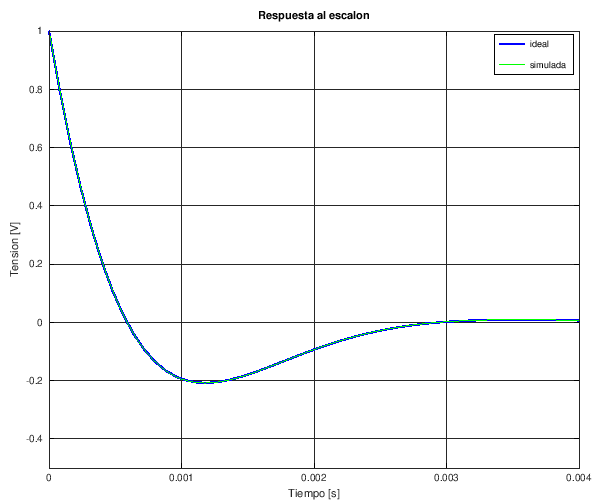

In [17]:
pkg load control
pkg load symbolic
clc
clear all
close all

s = tf('s');

%Dibuja el bode del modulo

function graficar_modulo_dB (string,w_ideal,Modulo_ideal_dB,color="b")
  semilogx(w_ideal,Modulo_ideal_dB, "markersize", 10, "linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("|H(jw)| [dB]")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction

%Dibuja el bode de fase

function graficar_fase_dB (string,w_ideal,fase_ideal,color="b")
  semilogx(w_ideal,fase_ideal,"markersize", 10, "linewidth", 5,"color",color)
  xlabel("w_0 [rad/s]")
  ylabel("Arg(H(jw)) []")
  title(string)
  grid on
  g=get (gcf, "currentaxes");
  set(g,"fontweight","bold","linewidth",2)
endfunction

%Respuesta al escalon
function respuesta_al_escalon(h,string="Respuesta al escalon",color="b")
    [Y_step_ideal,T_step_ideal] = step(h);
    plot(T_step_ideal, Y_step_ideal,"markersize", 10, "linewidth", 5,"color",color)
    title(string)
    xlabel ("Tiempo [s]");
    ylabel ("Tension [V]");
    grid on
    grid minor on
endfunction

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[600 500];
graphics_toolkit("gnuplot")
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);


%%%%%%%%TRANSFERENCIA ORIGINAL
h = (s^2)/(s^2+2666*s+3.553*10^6);
[Modulo_ideal,fase_ideal, w_ideal] = bode(h);
Modulo_ideal_dB = 20*log10(Modulo_ideal);
%%%RESPUESTA AL ESCALON IDEAL
respuesta_al_escalon(h,"Respuesta al escalon")

leido = dlmread('/home/vero/Documentos/ADC/tp/respuesta_escalon.txt',',');
hold on
tiempos = leido(1:end,1);
tensiones = leido(1:end,2);
plot(tiempos,tensiones,"g");
xlim([0 4e-3])
ylim([-0.5 1])
legend("ideal","simulada")

Puede observarse que "se pega bien" a la curva de la transferencia original

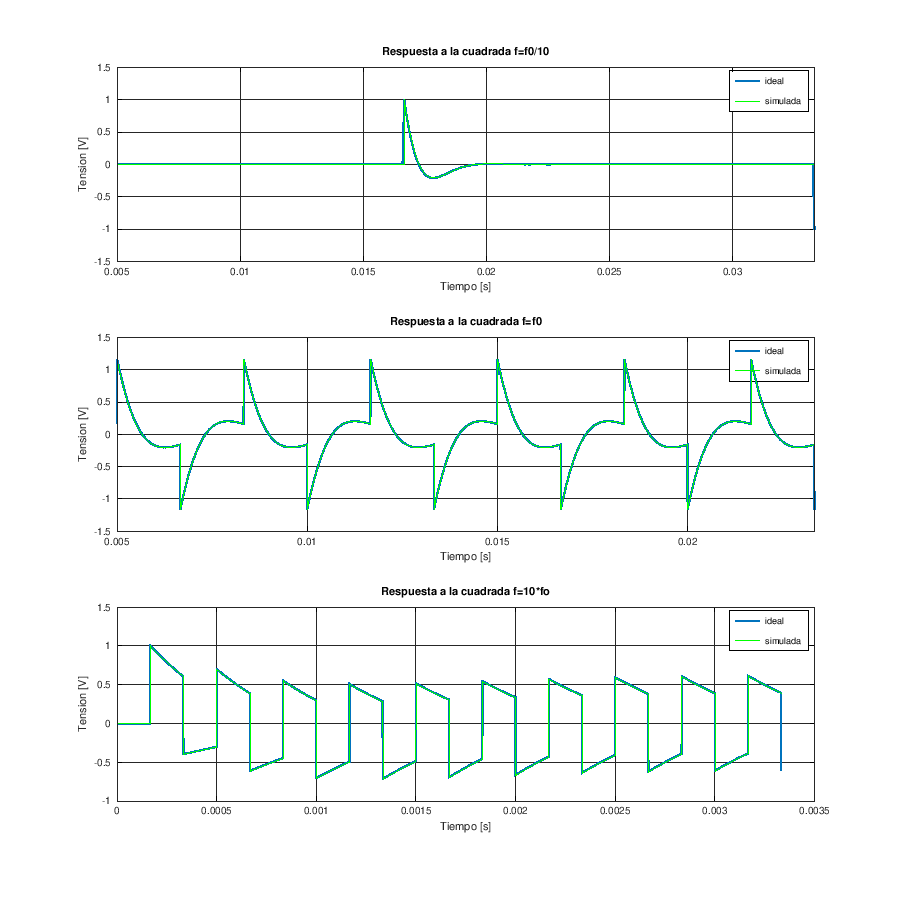

In [8]:
pkg load control
pkg load symbolic
clc
clear all
close all

s = tf('s');
h = (s^2)/(s^2+2666*s+3.553*10^6);
w0=sqrt(3.553)*10^3;
f0=w0/(2*pi);

%Creo una función para generar la onda cuadrada así no repito 3 veces el mismo código
function generar_onda_cuadrada(h,periodo , duracion_en_periodos, titulo)
    [cuad,t] = gensig("SQUARE" , periodo , periodo*duracion_en_periodos,periodo/500);  %armo mi cuadrada de periodo 10/fo y duracion 5 periodos
    [V1,t1] = lsim(h,cuad,t); % respuesta al filtro
    plot(t1,V1,"markersize", 10, "linewidth", 5)
    xlabel("Tiempo [s]")
    ylabel("Tension [V]")
    title(titulo)
    grid on
endfunction

function plotear_de_csv(archivo,separador,delay=0)
    leido = dlmread(archivo,',');
    hold on
    tiempos = leido(1:end,1);
    tensiones = leido(1:end,2);
    plot(tiempos+delay,tensiones,"g");
endfunction

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[900 900];
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);

%Armo mi cuadrada de periodo 10/fo y duracion 7 periodos
subplot(3,1,1);
generar_onda_cuadrada(h,10/f0 , 7,"Respuesta a la cuadrada f=f0/10");  
plotear_de_csv('/home/vero/Documentos/ADC/tp/rta_cuadrada_30_Hz.txt',',');
xlim([0.005 10/f0])
legend("ideal","simulada")

% Defino una cuadrada con T= 1/f0 y dura 7 periodos
subplot(3,1,2);
generar_onda_cuadrada(h,1/f0 , 7,"Respuesta a la cuadrada f=f0");
plotear_de_csv('/home/vero/Documentos/ADC/tp/rta_cuadrada_300_Hz.txt',',');
xlim([0.005 7/f0])
legend("ideal","simulada")


% Defino una cuadrada con T= 1/(10*f0) (frec 10 f0) y dura 10 periodos
subplot(3,1,3);
generar_onda_cuadrada(h,1/(10*f0) , 10,"Respuesta a la cuadrada f=10*fo"); 
plotear_de_csv('/home/vero/Documentos/ADC/tp/rta_cuadrada_3000_Hz.txt',1/(10*f0));
legend("ideal","simulada")



Aquí ocurre exactamente lo mismo a lo que ocurría con la respuesta al escalón.
Ahora realizamos los diagramas de bode:

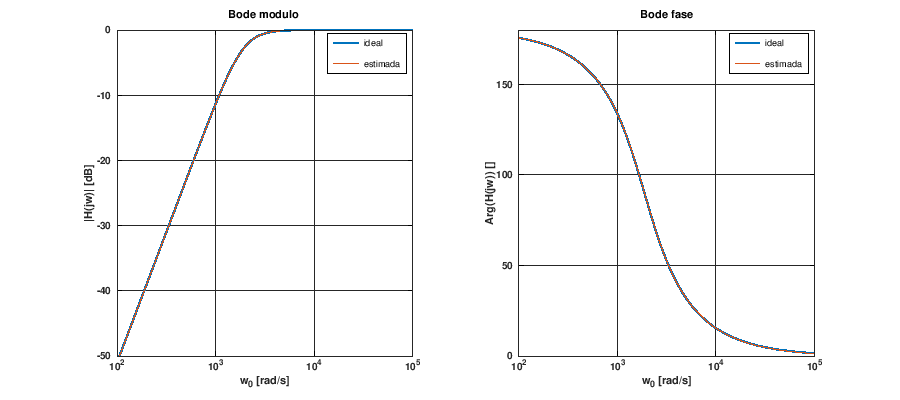

In [18]:
leido = dlmread('/home/vero/Documentos/ADC/tp/bodedB.csv',' ');

frec = leido(1:end,1);
modulo = leido(1:end,2);
fase = leido(1:end,3);

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[900 400];
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);

%%%%%MODULO
subplot(1,2,1);
plot(w_ideal,Modulo_ideal_dB,"markersize", 10, "linewidth", 5);
hold on
plot(frec*2*pi,modulo)
title("Bode modulo ")
set(gca, 'XScale', 'log');


grid on
g=get (gcf, "currentaxes");
set(g,"fontweight","bold","linewidth",2)
xlabel("w_0 [rad/s]")
ylabel("|H(jw)| [dB]")
legend("ideal","estimada")
xlim([1e2 1e5])
ylim([-50 0])


%%%FASE
subplot(1,2,2);
plot(w_ideal,fase_ideal,"markersize", 10, "linewidth", 5);
hold on

plot(frec*2*pi,fase)
set(gca, 'XScale', 'log');
title("Bode fase")

grid on
g=get (gcf, "currentaxes");
set(g,"fontweight","bold","linewidth",2)
xlabel("w_0 [rad/s]")
ylabel("Arg(H(jw)) []")
legend("ideal","estimada")
ylim([0 180])
xlim([1e2 1e5])


 *LT-SPICE* devuelve los resultados en Hz por lo que ha sido necesario pasarlos a radianes para comparar gráficamente. Al igual que en el resto de los gráficos no se observan diferencias significativas, ambas curvas se solapan muy bien.

## Esquemático del circuito real
Para poder medir nuestro circuito se ha realizado el siguiente esquemático:
![Circuito](img/circuito.svg)

Se armó el circuito en una placa experimental para mayor comodidad a la hora de realizar las mediciones (evita que se nos muevan demasiado los componentes por estar soldados a la placa).

## Instrumental utilizado para medir
* Generador de funciones Topward 8140
* Osciloscopio Tektronix TDS 1002 (2 canales, 60 MHz, 1 GS/s)
* Multímetro True RMS TK-4002
* Fuente HY3005D-3 Protomax
* Banana-cocodrilos
* Puntas de osciloscopio

## Diagrama de interconexión del instrumental
Para medir el circuito se debió conectar el instrumental de la siguiente forma:
%foto esquema y al lado vida real



## Mediciones obtenidas




Se pudo obtener la siguiente tabla de las mediciones tomadas:

| frecuencia [Hz] | Tension[mV] |
|-----------------|-------------|
| 30              | 14          |
| 37.79           | 21          |
| 47.61           | 29          |
| 59.98           | 46.4        |
| 75.57           | 70.8        |
| 95.21           | 114         |
| 119.95          | 162         |
| 151.12          | 272         |
| 190.39          | 404         |
| 239.87          | 568         |
| 302.21          | 736         |
| 380.76          | 836         |
| 479.72          | 904         |
| 604.41          | 940         |
| 761.50          | 956         |
| 959.42          | 964         |
| 1208.79         | 972         |
| 1522.98         | 972         |
| 1918.83         | 972         |
| 2417.57         | 972         |
| 3045.95         | 972         |

## Comparando resultados entre simulación y mediciones

Se realizó un gráfico donde se ven las tres curvas del módulo de la transferencia para poder comparar la respuesta del filtro en los distintos casos:

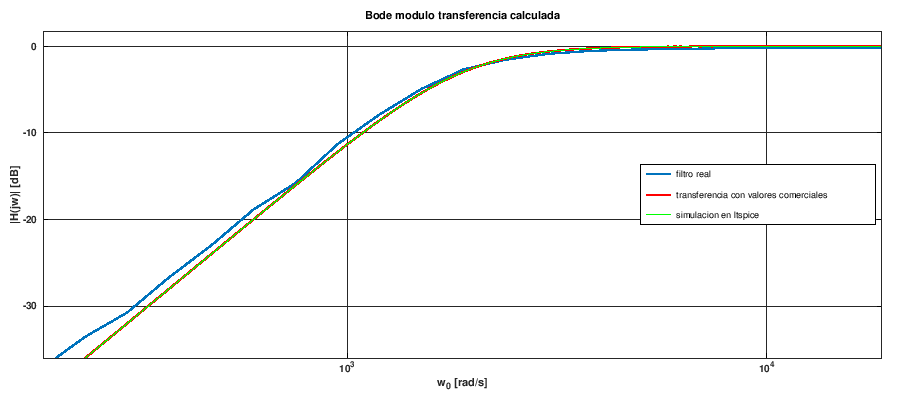

In [41]:
pkg load signal
pkg load symbolic

leido = dlmread('/home/vero/Documentos/ADC/tp/img/mediciones/mediciones.csv',',');

frec = leido(1:end,1);
tension = leido(1:end,2)*10^(-3);

%Configuracion de pantalla
posicion_pantalla= [0 0];
tamanio_imagen=[900 400];
figure(1, 'position',[posicion_pantalla,tamanio_imagen]);

%%%%%MODULO
tensiones_db=20*log10(tension./vi);
vi=1;
plot(2*pi*frec,tensiones_db,"markersize", 10, "linewidth", 5);

%%%%%%%%TRANSDERENCIA ESTIMADA
h_est=(s^2)/(s^2+2667*s+3.565*10^6);
[Modulo_ideal_2,fase_ideal_2, w_ideal_2] = bode(h_est);
Modulo_ideal_dB_2 = 20*log10(Modulo_ideal_2);

%%%%%MODULO
hold on
graficar_modulo_dB("Bode modulo transferencia calculada",w_ideal_2,Modulo_ideal_dB_2,"r");
xlim([2*pi*30 2*pi*3000])


leido = dlmread('/home/vero/Documentos/ADC/tp/bodedB.csv',' ');

frec_spice = leido(1:end,1);
Mod_spice = leido(1:end,2);
fase = leido(1:end,3);
%%%%%MODULO LTSPICE
plot(frec_spice*2*pi,Mod_spice,"g");
legend("filtro real","transferencia con valores comerciales","simulacion en ltspice","location", "east")
ylim([-36 max(tensiones_db)+2])


# Conclusiones del trabajo práctico

## Respuesta a senoidales
Se midió la respuesta del filtro utilizando senoidales desde $f_0/10$ hasta $10\cdot f_0$ en tercios de octava.
%fotos
Los resultados fueron los siguientes:


## Procedimiento para medir las características principales del filtro
%fotos
* Frecuencia de corte
* Frecuendia 

## Respuesta a diferentes ondas cuadradas
%fotos 
Se midió la respuesta al circuito para diferentes ondas cuadradas(distinta frecuencia). Los resultados resultaron ser:
 

